In [229]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

import matplotlib.pyplot as plt

In [230]:
iris_data_root = load_iris()

In [231]:
iris_df1 = pd.DataFrame(iris_data_root['data'], columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df1

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


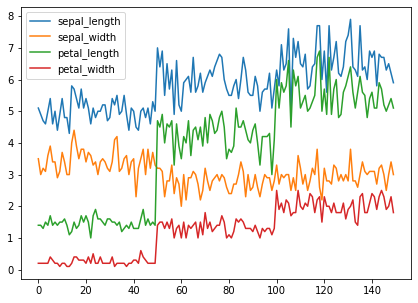

In [232]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5), sharey=True)
for feature in iris_df1.columns:
    axes.plot(iris_df1.index, iris_df1.loc[:, feature], label=feature)

axes.legend()

In [233]:
X = np.array(iris_data_root['data'])

In [234]:
selector = VarianceThreshold(threshold=0.2)
selector.fit(X)
X = selector.transform(X)

iris_feature_names = np.array(iris_data_root['feature_names'])[selector.get_support()]
display(iris_feature_names)
y = np.array(iris_data_root['target'])

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

In [235]:
selector = SelectKBest(chi2, k = 2)
selector.fit(X, y)
selector.scores_
X = selector.transform(X)

In [236]:
selector.get_support()

array([False,  True,  True])

In [237]:
iris_feature_names = iris_feature_names[selector.get_support()]
print(iris_feature_names)

['petal length (cm)' 'petal width (cm)']


<h3>Predict</h3>

In [238]:
X_train, X_true, y_train, y_true = train_test_split(X, y, test_size=0.25, random_state=12)

In [239]:
model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_true)

In [240]:
y_pred

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1])

In [241]:
y_true

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1])

In [242]:
metrics.accuracy_score(y_true, y_pred)

0.9736842105263158

In [243]:
metrics.precision_score(y_true, y_pred, average='micro')

0.9736842105263158

In [244]:
metrics.confusion_matrix(y_true, y_pred)

array([[15,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 11]])

In [245]:
model = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=2, random_state=0))
model.fit(X_train, y_train)
y_pred = model.predict(X_true)

In [246]:
y_pred

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1])

In [247]:
metrics.accuracy_score(y_true, y_pred)

0.9736842105263158

In [248]:
metrics.confusion_matrix(y_true, y_pred)

array([[15,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 11]])